In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# Loading dataset from training

In [4]:
data = pd.read_csv('./input/dataset_malwares.csv', sep =',')
X = data.drop(['Name','Malware'],axis=1)
y = data['Malware']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
11441,23117,144,3,0,4,0,65535,0,184,0,...,3791650912,0,17,22,0,409626,422944,81920,77824,0
2624,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,135,0,0,113332,131072,0,0
18874,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,15,347,4,111632,132520,139264,0,0
16415,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,7,159,0,0,29736,241664,0,117181216
11179,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,4,88,0,0,222988,241664,0,719360


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [6]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,1.076024,0.0,1.379922,-0.623512,-0.087645,0.000436,-0.000677,-0.067061,-0.019125,-0.040622
1,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.656755,0.249356,-0.087645,-0.016366,-0.059942,-0.060538,-0.020494,-0.040622
2,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,1.125337,1.886949,-0.063126,-0.011787,-0.056269,-0.059451,-0.020494,-0.040622
3,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,0.106999,0.434744,-0.087645,-0.016366,-0.075943,-0.045862,-0.020494,5.561297
4,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.274878,-0.113695,-0.087645,-0.016366,-0.038952,-0.045862,-0.020494,-0.006233


In [42]:
skpca = PCA(n_components=10)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.47041419669115747


In [43]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
model = RFC(n_estimators=100, random_state=0,oob_score=True,max_depth=16,max_features='sqrt')
model.fit(X_pca,y_train)

X_test_scaled=scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

y_pred = model.predict(X_test_pca)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       973
           1       0.99      0.99      0.99      2950

    accuracy                           0.98      3923
   macro avg       0.97      0.97      0.97      3923
weighted avg       0.98      0.98      0.98      3923



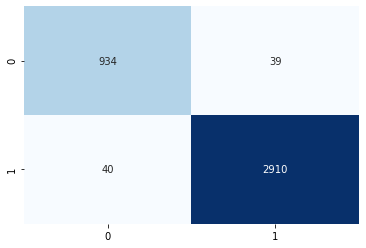

In [45]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt="d",cmap=plt.cm.Blues,cbar=False)

In [46]:
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scale', scaler),('pca', skpca), ('clf', model)])
#joblib.dumps(pipe, 'my_model')

In [47]:
test = pd.read_csv('./input/dataset_test.csv', sep=',')

X_to_push = test
X_testing = test.drop(['Name'], axis=1)


clf = pipe
X_testing_scaled = clf.named_steps['scale'].transform(X_testing)
X_testing_pca = clf.named_steps['pca'].transform(X_testing_scaled)
y_testing_pred = clf.named_steps['clf'].predict_proba(X_testing_pca)
pd.concat([X_to_push['Name'], pd.DataFrame(y_testing_pred) ], axis=1)

,Name,0,1
0,Skype-8.10.0.9.exe,0.601059,0.398941
1,vlc-3.0.2-win64.exe,0.138793,0.861207
2,stinger32.exe,0.100000,0.900000
3,SpotifyFullSetup.exe,0.879050,0.120950
4,uftp_english.exe,0.031374,0.968626
5,161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...,0.260681,0.739319
6,eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...,0.000646,0.999354
7,reverse_shell.exe,0.075131,0.924869
8,873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...,0.015625,0.984375
9,ScratchInstaller1.4.exe,0.045859,0.954141
